In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
loaded = np.load("Data/subject_9.npz")
data = loaded['data']
#get a specific silhouette
silh = data[0,0,:,:]
print(data.shape)


(9, 1200, 424, 512)


In [4]:
import numpy as np
loaded = np.load('Data/DIRO_skeletons.npz')

#get skeleton data of size (n_subject, n_gait, n_frame, 25*3)
data = loaded['data']

#get joint coordinates of a specific skeleton
skel = data[0,0,0,:]
x = [skel[i] for i in range(0, len(skel), 3)]
y = [skel[i] for i in range(1, len(skel), 3)]
z = [skel[i] for i in range(2, len(skel), 3)]

#get default separation
separation = loaded['split']

#print information
print(data.shape)
print(separation)

(9, 9, 1200, 75)
['train' 'test' 'train' 'test' 'train' 'train' 'test' 'test' 'train']


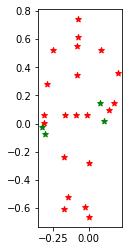

In [5]:
# Understand which index points to which joint

i = 0
j = 21
k = len(x)

fig, ax = plt.subplots()
ax.scatter(x[i:j], y[i:j], label= "stars", color= "red", marker= "*")
ax.scatter(x[j:k], y[j:k], label= "stars", color= "green", marker= "*")

ax.set_aspect(1)
plt.show()

In [6]:
pairs = [
    (2,3),  (0,1), (3,20), (1,20),
    (4,5),  (5,6), (6,7), 
    (8,9),  (9,10),(10,11),
    (4,20), (8,20), 
    (12,16),
    (12,13),(13,14), (14,15),
    (16,17),(17,18), (18,19),
    ]

def plot_skeleton(fig, ax, x,y,z, is3D=False):
    ax.clear()
    if is3D:
        for (i,j) in pairs:
            ax.plot3D([x[i],x[j]],[z[i],z[j]],[y[i],y[j]],  'bo', linestyle="-")
#             print([z[i],z[j]],[y[i],y[j]],[x[i],x[j]])
#         ax.scatter3D(x, y, z, label= "stars", color= "red", marker= "*")

    else:
        plt.axis('off')
        for (i,j) in pairs:
            plt.plot([x[i],x[j]], [y[i],y[j]],'go', linestyle="-")

    plt.show()

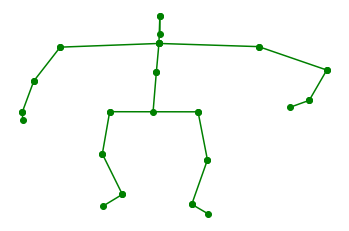

In [7]:
fig, ax = plt.subplots()
plot_skeleton(fig, ax, x,y,z)

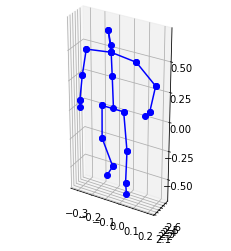

25


In [8]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect(aspect = (1,0.3,2))
plot_skeleton(fig, ax, x,y,z, True)
# ax.scatter3D(z, y, x);

print(len(x))

In [9]:
## walk animation


%matplotlib notebook
from IPython.display import HTML
# HTML(ani.to_jshtml())
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

FRAMES = 16


def animate(i, is3D):
    i = i%FRAMES
    skel = data[0,0,i,:]
    x = [skel[i] for i in range(0, len(skel), 3)]
    y = [skel[i] for i in range(1, len(skel), 3)]
    z = [skel[i] for i in range(2, len(skel), 3)]

    plot_skeleton(fig, ax, x,y,z, is3D)
    

def animate_2D(i):
    animate(i, False)
    
def animate_3D(i):
    animate(i, True)

<IPython.core.display.Javascript object>


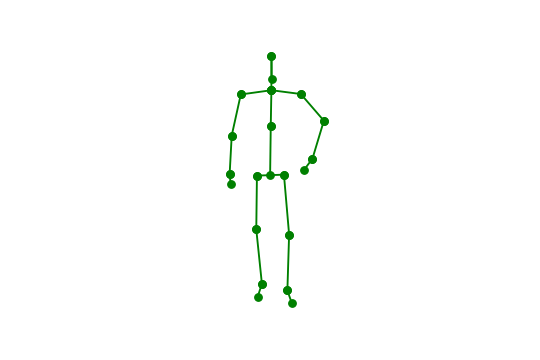

In [10]:
## 2D walk animation

fig, ax = plt.subplots()
ax.set_aspect(1)
anim_2D = animation.FuncAnimation(fig, animate_2D, interval=500) 
plt.show()
# anim_2D.save('2D_walk.gif', writer = 'imagemagick')

<IPython.core.display.Javascript object>


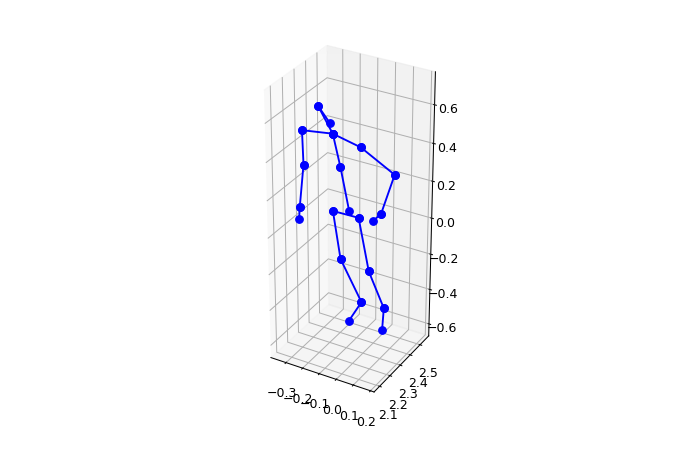

In [11]:
## 3D walk animation

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.set_box_aspect(aspect = (1,0.1,2))
ax.set_box_aspect((np.ptp(z), np.ptp(x), np.ptp(y)))  # aspect ratio is 1:1:1 in data space
anim_3D = animation.FuncAnimation(fig, animate_3D, interval=5) 
plt.show()
# anim_3D.save('3D_walk.gif', writer = 'imagemagick')

In [12]:
%matplotlib inline
import IPython.display as ipd

ipd.Audio('Rock3.wav') # load a local WAV file

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [14]:
import pretty_midi
import numpy as np

midi_data = pretty_midi.PrettyMIDI('teddybear.mid')
beats = midi_data.get_beats()
print(beats)

[  0.       0.5625   1.125    1.6875   2.25     2.8125   3.375    3.9375
   4.5      5.0625   5.625    6.1875   6.75     7.3125   7.875    8.4375
   9.       9.5625  10.125   10.6875  11.25    11.8125  12.375   12.9375
  13.5     14.0625  14.625   15.1875  15.75    16.3125  16.875   17.4375
  18.      18.5625  19.125   19.6875  20.25    20.8125  21.375   21.9375
  22.5     23.0625  23.625   24.1875  24.75    25.3125  25.875   26.4375
  27.      27.5625  28.125   28.6875  29.25    29.8125  30.375   30.9375
  31.5     32.0625  32.625   33.1875  33.75    34.3125  34.875   35.4375
  36.      36.5625  37.125   37.6875  38.25    38.8125  39.375   39.9375
  40.5     41.0625  41.625   42.1875  42.75    43.3125  43.875   44.4375
  45.      45.5625  46.125   46.6875  47.25    47.8125  48.375   48.9375
  49.5     50.0625  50.625   51.1875  51.75    52.3125  52.875   53.4375
  54.      54.5625  55.125   55.6875  56.25    56.8125  57.375   57.9375
  58.5     59.0625  59.625   60.1875  60.75    61.3

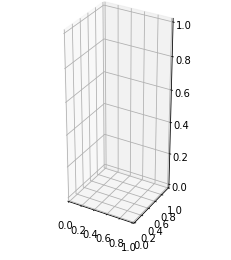

MovieWriter imagemagick unavailable; using Pillow instead.


In [41]:
## 3D walk animation

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.set_box_aspect(aspect = (1,0.1,2))
ax.set_box_aspect((np.ptp(z), np.ptp(x), np.ptp(y)))  # aspect ratio is 1:1:1 in data space

anim_3D = animation.FuncAnimation(fig, animate_3D, interval=2) 
plt.show()
anim_3D.save('3D_walk.gif', writer = 'imagemagick')

In [51]:
import moviepy.editor as mp

clip = mp.VideoFileClip("3D_walk.gif")
clip.write_videofile("3D_walk.mp4")

Moviepy - Building video 3D_walk.mp4.
Moviepy - Writing video 3D_walk.mp4



Moviepy - Done !
Moviepy - video ready 3D_walk.mp4


In [43]:
import moviepy.editor as mpe


def combine_audio(vidname, audname, outname, fps=60): 
    my_clip = mpe.VideoFileClip(vidname)
    audio_background = mpe.AudioFileClip(audname)
    final_clip = my_clip.set_audio(audio_background)
    myclip2 = final_clip.subclip(0, 12)
    myclip2.write_videofile(outname,fps=fps)

combine_audio("3D_walk.mp4", "teddybear.mp3", "3D_walk_.mp4") # i create a new file
# combine_audio("test.mp4", "test.mp3", "test.mp4") # i rewrite on the same file```

Moviepy - Building video 3D_walk_.mp4.
MoviePy - Writing audio in 3D_walk_TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video 3D_walk_.mp4



Moviepy - Done !
Moviepy - video ready 3D_walk_.mp4


In [21]:
import pretty_midi
import numpy as np

midi_data = pretty_midi.PrettyMIDI('Stairwaytoheaven.mid')
beats = midi_data.get_beats()
print(beats)

[  0.           0.722891     1.445782     2.168673     2.891564
   3.614455     4.337346     5.060237     5.783128     6.506019
   7.22891      7.951801     8.674692     9.397583    10.120474
  10.843365    11.566256    12.289147    13.012038    13.734929
  14.45782     15.180711    15.903602    16.626493    17.349384
  18.072275    18.795166    19.518057    20.240948    20.963839
  21.68673     22.409621    23.132512    23.855403    24.578294
  25.301185    26.024076    26.746967    27.469858    28.192749
  28.91564     29.638531    30.361422    31.084313    31.807204
  32.530095    33.252986    33.975877    34.698768    35.421659
  36.14455     36.867441    37.590332    38.313223    39.036114
  39.759005    40.481896    41.204787    41.927678    42.650569
  43.37346     44.096351    44.819242    45.542133    46.265024
  46.987915    47.710806    48.433697    49.156588    49.879479
  50.60237     51.325261    52.048152    52.771043    53.493934
  54.216825    54.939716    55.662607   

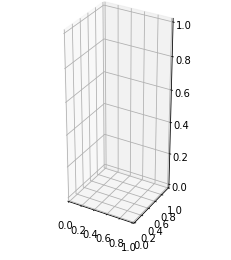

MovieWriter imagemagick unavailable; using Pillow instead.


In [44]:
## 3D walk animation

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.set_box_aspect(aspect = (1,0.1,2))
ax.set_box_aspect((np.ptp(z), np.ptp(x), np.ptp(y)))  # aspect ratio is 1:1:1 in data space

anim_3D = animation.FuncAnimation(fig, animate_3D, interval=240) 
plt.show()
anim_3D.save('3D_walk_sth.gif', writer = 'imagemagick')

In [45]:
import moviepy.editor as mp

clip = mp.VideoFileClip("3D_walk_sth.gif")
clip.write_videofile("3D_walk_sth.mp4")

Moviepy - Building video 3D_walk_sth.mp4.
Moviepy - Writing video 3D_walk_sth.mp4



Moviepy - Done !
Moviepy - video ready 3D_walk_sth.mp4


In [50]:
import moviepy.editor as mpe


def combine_audio(vidname, audname, outname, fps=60): 
    my_clip = mpe.VideoFileClip(vidname)
    audio_background = mpe.AudioFileClip(audname)
    final_clip = my_clip.set_audio(audio_background)
    myclip2 = final_clip.subclip(0, 12)
    myclip2.write_videofile(outname,fps=fps)
    

combine_audio("3D_walk_sth.mp4", "Stairwaytoheaven.mp3", "3D_walk_sth1.mp4") # i create a new file
# combine_audio("test.mp4", "test.mp3", "test.mp4") # i rewrite on the same file```

Moviepy - Building video 3D_walk_sth1.mp4.
MoviePy - Writing audio in 3D_walk_sth1TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video 3D_walk_sth1.mp4



Moviepy - Done !
Moviepy - video ready 3D_walk_sth1.mp4
